In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r"SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
print(df.dtypes)
df.shape  

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


(9994, 13)

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.select_dtypes('object').nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [14]:
df.duplicated().sum()

17

In [15]:
df=df.drop_duplicates(keep=False)
df.shape

(9960, 13)

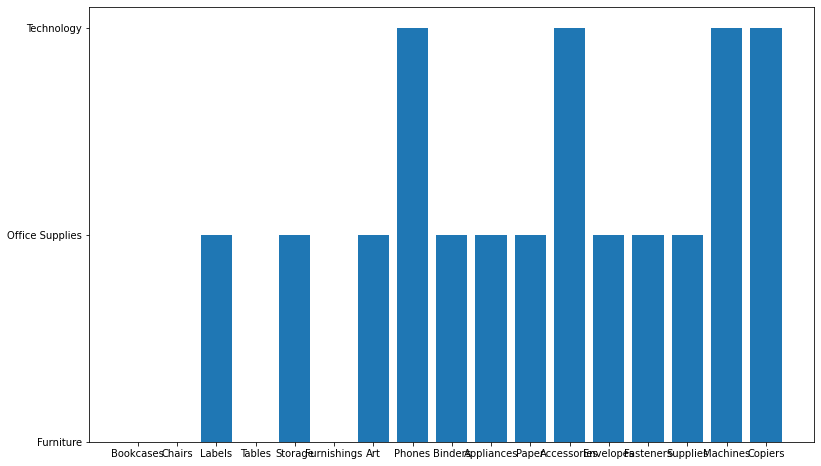

In [16]:
plt.figure(figsize=(13,8))
plt.bar("Sub-Category","Category",data=df)
plt.show()

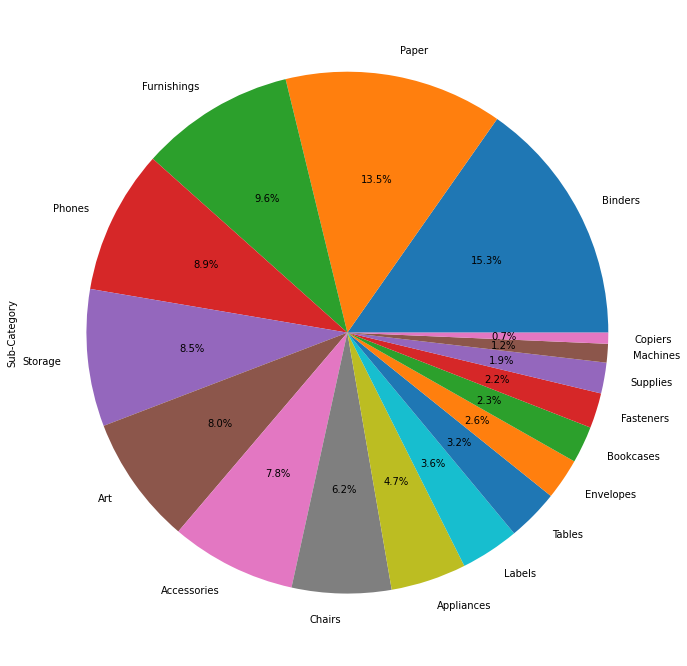

In [17]:
plt.figure(figsize=(12,12))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

In [18]:
df_corr=df.corr()
df_corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023096,0.013461,0.060012,-0.029823
Sales,-0.023096,1.000000,0.200649,-0.028433,0.479070
Quantity,0.013461,0.200649,1.000000,0.008734,0.066168
Discount,0.060012,-0.028433,0.008734,1.000000,-0.219837
Profit,-0.029823,0.479070,0.066168,-0.219837,1.000000


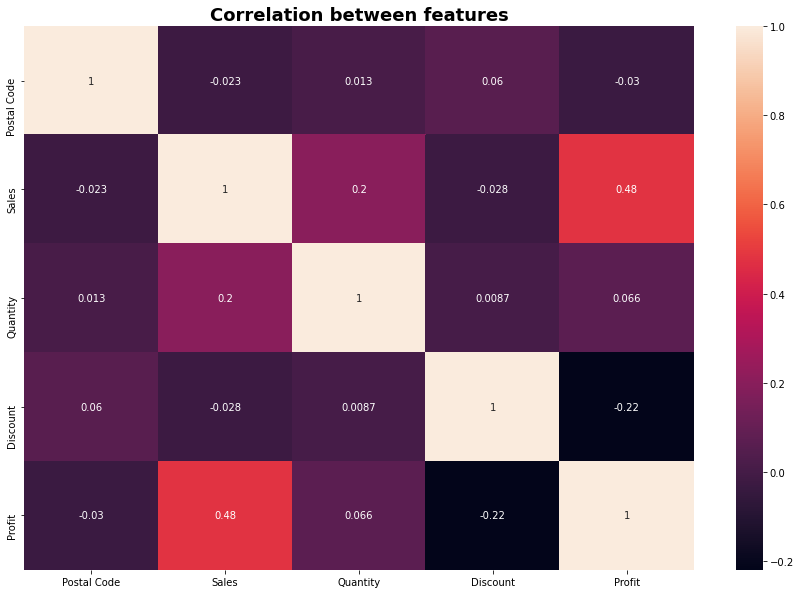

In [29]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

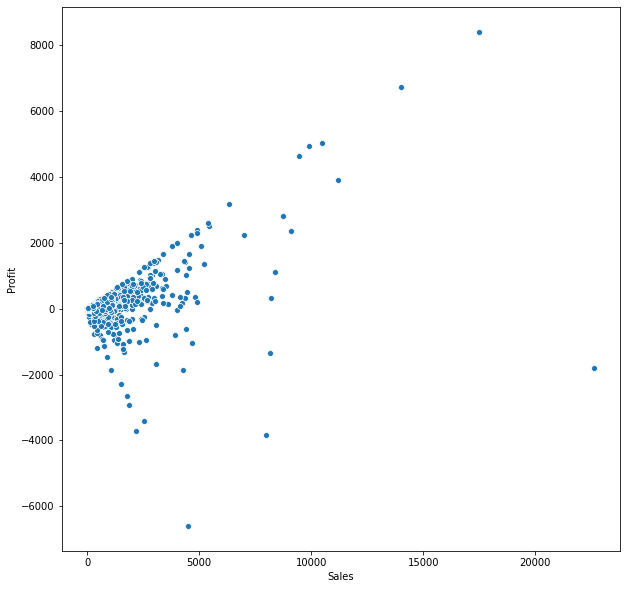

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot("Sales",'Profit',data=df)

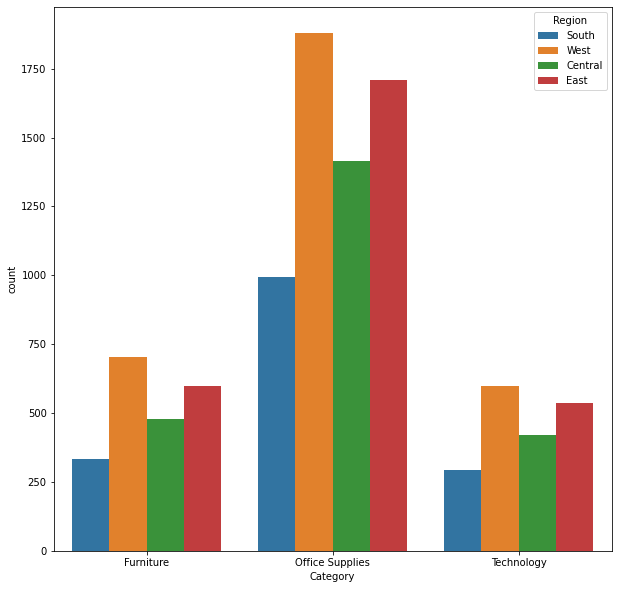

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x="Category", hue="Region", data=df)

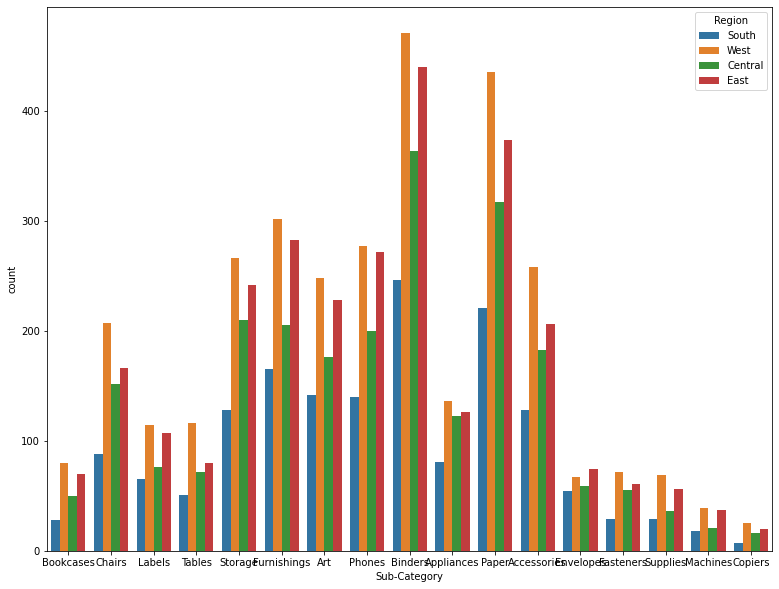

In [24]:
plt.figure(figsize=(13,10))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

<Figure size 720x576 with 0 Axes>

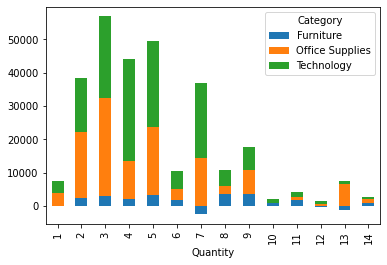

In [23]:
plt.figure(figsize=(10,8))
pd.crosstab(df["Quantity"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)